In [3]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.decomposition import RandomizedPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets.samples_generator import make_blobs
from scipy.sparse import coo_matrix
import numpy as np

from pandas.plotting import parallel_coordinates
from wkf.Enums import Category, Country, UseCases, Paths, DataSetType
from wkf.Data import Data

In [4]:
def get_train(predictors, response):
    X_train = train_set[predictors].apply(lambda x: ' '.join(x), axis=1)
    y_train = train_set[response]
    return X_train, y_train


def get_train_test_vectorized(X_train):
    vect = CountVectorizer().fit(X_train)
    X_train_vectorized = vect.transform(X_train)
    return X_train_vectorized


def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

In [7]:
country = Country.BE
category = Category.BEER
use_case = UseCases.UC2
paths = Paths(country=country, category=category, use_case=use_case)
data = Data(paths)
train_set = data.get_data_frame_from_csv(DataSetType.TRAIN)
all_predictors = data.cols_in_train_set.union(data.cols_in_test_set) - data.output_cols_from_metadata - data.cols_in_train_set.symmetric_difference(data.cols_in_test_set)
all_predictors = all_predictors - data.cols_in_train_and_test_but_not_in_metadata
all_predictors = set(['item_description']).union(all_predictors)
responses = data.output_cols_from_metadata

X_train, y_train = get_train(list(all_predictors), 'global_outer_packaging')
X_train_vectorized = get_train_test_vectorized(X_train)

getting train_set data from csv...
dataframe size: 667029 dataframe shape: (5423, 123)


In [8]:
# pca = RandomizedPCA(n_components=50, whiten=True)
lda = LDA(n_components=9)
lda_transformed = pd.DataFrame(lda.fit_transform(X_train_vectorized.toarray(), y_train))

/home/alex/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


/home/alex/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [1]:
print lda_transformed.shape
print lda_transformed.head()

NameError: name 'lda_transformed' is not defined

In [ ]:
# plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label='Class 1', c='red')
# plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label='Class 2', c='blue')
# plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')
plt.scatter(lda_transformed[0], lda_transformed[1])

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

# display
plt.show()

In [10]:
# import numpy as np
# from scipy.sparse import coo_matrix

# shape = (100000, 100000)
# rows = np.int_(np.round_(shape[0]*np.random.random(1000)))
# cols = np.int_(np.round_(shape[1]*np.random.random(1000)))
# vals = np.ones_like(rows)
# 
# m = coo_matrix((vals, (rows, cols)), shape=shape)
# ax = plot_coo_matrix(m)
ax = plot_coo_matrix(X_train_vectorized)
ax.figure.show()
# ax.figure

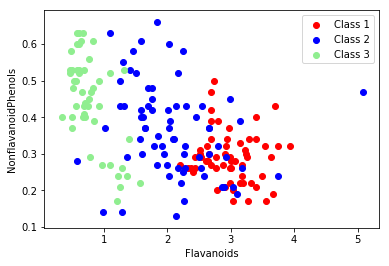

In [16]:
# three different scatter series so the class labels in the legend are distinct
plt.scatter(X[y==1]['Flavanoids'], X[y==1]['NonflavanoidPhenols'], label='Class 1', c='red')
plt.scatter(X[y==2]['Flavanoids'], X[y==2]['NonflavanoidPhenols'], label='Class 2', c='blue')
plt.scatter(X[y==3]['Flavanoids'], X[y==3]['NonflavanoidPhenols'], label='Class 3', c='lightgreen')

# Prettify the graph
plt.legend()
plt.xlabel('Flavanoids')
plt.ylabel('NonflavanoidPhenols')

# display
plt.show()

Feature Scaling

Before we go further, we should apply feature scaling to our dataset. In this example, I will simply rescale the data to a [0,1][0,1] range, but it is also common to standardize the data to have a zero mean and unit standard deviation.

Method 2: PCA Plotting

Principle Component Analysis (PCA) is a method of dimensionality reduction. It has applications far beyond visualization, but it can also be applied here. It uses eigenvalues and eigenvectors to find new axes on which the data is most spread out. From these new axes, we can choose those with the most extreme spreading and project onto this plane. (This is an extremely hand-wavy explanation; I recommend reading more formal explanations of this.)

In Python, we can use PCA by first fitting an sklearn PCA object to the normalized dataset, then looking at the transformed matrix.

In [6]:
X_norm = (X - X.min())/(X.max() - X.min())

In [7]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

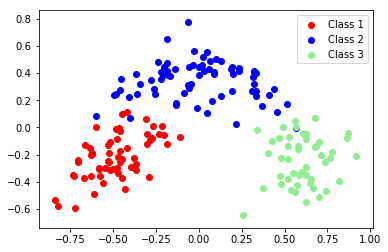

In [8]:
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

Method 2: PCA Plotting

Principle Component Analysis (PCA) is a method of dimensionality reduction. It has applications far beyond visualization, but it can also be applied here. It uses eigenvalues and eigenvectors to find new axes on which the data is most spread out. From these new axes, we can choose those with the most extreme spreading and project onto this plane. (This is an extremely hand-wavy explanation; I recommend reading more formal explanations of this.)

In Python, we can use PCA by first fitting an sklearn PCA object to the normalized dataset, then looking at the transformed matrix.

In [9]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))

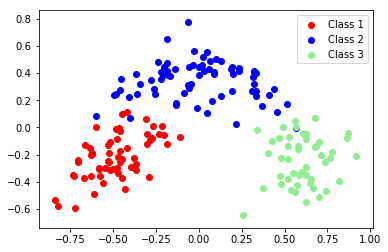

In [10]:
plt.scatter(transformed[y==1][0], transformed[y==1][1], label='Class 1', c='red')
plt.scatter(transformed[y==2][0], transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(transformed[y==3][0], transformed[y==3][1], label='Class 3', c='lightgreen')

plt.legend()
plt.show()

Method 3: Linear Discriminant Analysis

A similar approach to projecting to lower dimensions is Linear Discriminant Analysis (LDA). This is similar to PCA, but (at an intuitive level) attempts to separate the classes rather than just spread the entire dataset.

The code for this is similar to that for PCA:

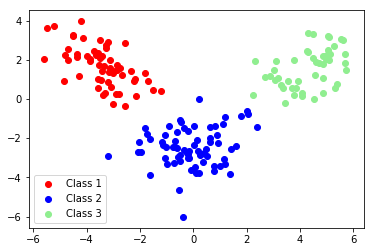

In [11]:
lda = LDA(n_components=2) #2-dimensional LDA
lda_transformed = pd.DataFrame(lda.fit_transform(X_norm, y))

# Plot all three series
plt.scatter(lda_transformed[y==1][0], lda_transformed[y==1][1], label='Class 1', c='red')
plt.scatter(lda_transformed[y==2][0], lda_transformed[y==2][1], label='Class 2', c='blue')
plt.scatter(lda_transformed[y==3][0], lda_transformed[y==3][1], label='Class 3', c='lightgreen')

# Display legend and show plot
plt.legend(loc=3)
plt.show()

Method 4: Parallel Coordinates

The final visualization technique I’m going to discuss is quite different than the others. Instead of projecting the data into a two-dimensional plane and plotting the projections, the Parallel Coordinates plot (imported from pandas instead of only matplotlib) displays a vertical axis for each feature you wish to plot. Each sample is then plotted as a color-coded line passing through the appropriate coordinate on each feature. While this doesn’t always show how the data can be separated into classes, it does reveal trends within a particular class. (For instance, in this example, we can see that Class 3 tends to have a very low OD280/OD315.)

In [12]:
# Select features to include in the plot
plot_feat = ['MalicAcid', 'Ash', 'OD280/OD315', 'Magnesium','TotalPhenols']

# Concat classes with the normalized data
data_norm = pd.concat([X_norm[plot_feat], y], axis=1)

# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'Class')
plt.show()